# Temperature Forecast Project using ML

**Project Description:**
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
•	https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C://Users//rahul//OneDrive//Attachments//Desktop//data trained//internship//Evaluation project//phase 2//Temperature Forecast Project using ML- Eval proj-2//temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df.drop('Date', axis=1, inplace=True)

In [8]:
df.fillna(method='ffill', inplace=True)

In [9]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
# Feature Selection (Target: 'Next_Tmax' and 'Next_Tmin')
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']  # Predicting next-day maximum temperature
y_min = df['Next_Tmin']  # Predicting next-day minimum temperature

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [12]:
# Train-test split for both targets
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train_max = scaler.fit_transform(X_train_max)
X_test_max = scaler.transform(X_test_max)
X_train_min = scaler.fit_transform(X_train_min)
X_test_min = scaler.transform(X_test_min)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [15]:
# Model Building
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Evaluation
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"{name} Model Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print('-'*40)

In [16]:
# Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train_max, X_test_max, y_train_max, y_test_max, 'Linear Regression (Next_Tmax)')
evaluate_model(lr, X_train_min, X_test_min, y_train_min, y_test_min, 'Linear Regression (Next_Tmin)')

Linear Regression (Next_Tmax) Model Performance:
Mean Squared Error: 2.1101608601187194
R-squared: 0.7845060318127579
----------------------------------------
Linear Regression (Next_Tmin) Model Performance:
Mean Squared Error: 0.9376722698820483
R-squared: 0.8501835740614698
----------------------------------------


In [17]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
evaluate_model(dt, X_train_max, X_test_max, y_train_max, y_test_max, 'Decision Tree (Next_Tmax)')
evaluate_model(dt, X_train_min, X_test_min, y_train_min, y_test_min, 'Decision Tree (Next_Tmin)')

Decision Tree (Next_Tmax) Model Performance:
Mean Squared Error: 2.3449838813668604
R-squared: 0.7605254217906233
----------------------------------------
Decision Tree (Next_Tmin) Model Performance:
Mean Squared Error: 1.264468085106383
R-squared: 0.7979698287891084
----------------------------------------


In [18]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
evaluate_model(rf, X_train_max, X_test_max, y_train_max, y_test_max, 'Random Forest (Next_Tmax)')
evaluate_model(rf, X_train_min, X_test_min, y_train_min, y_test_min, 'Random Forest (Next_Tmin)')

Random Forest (Next_Tmax) Model Performance:
Mean Squared Error: 0.9353374558349448
R-squared: 0.9044814147767428
----------------------------------------
Random Forest (Next_Tmin) Model Performance:
Mean Squared Error: 0.5786785428755639
R-squared: 0.9075417351610077
----------------------------------------


In [19]:
# Support Vector Regressor
svr = SVR()
evaluate_model(svr, X_train_max, X_test_max, y_train_max, y_test_max, 'SVR (Next_Tmax)')
evaluate_model(svr, X_train_min, X_test_min, y_train_min, y_test_min, 'SVR (Next_Tmin)')

SVR (Next_Tmax) Model Performance:
Mean Squared Error: 1.340443574406876
R-squared: 0.8631111445391053
----------------------------------------
SVR (Next_Tmin) Model Performance:
Mean Squared Error: 0.6327639763310658
R-squared: 0.8989002443161747
----------------------------------------


In [20]:
# Hyperparameter Tuning using GridSearchCV for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train_max, y_train_max)
best_rf_max = rf_grid.best_estimator_
evaluate_model(best_rf_max, X_train_max, X_test_max, y_train_max, y_test_max, 'Tuned Random Forest (Next_Tmax)')

rf_grid.fit(X_train_min, y_train_min)
best_rf_min = rf_grid.best_estimator_
evaluate_model(best_rf_min, X_train_min, X_test_min, y_train_min, y_test_min, 'Tuned Random Forest (Next_Tmin)')

Tuned Random Forest (Next_Tmax) Model Performance:
Mean Squared Error: 0.9148590356931022
R-squared: 0.9065727131710856
----------------------------------------
Tuned Random Forest (Next_Tmin) Model Performance:
Mean Squared Error: 0.5715768455463479
R-squared: 0.9086764076325464
----------------------------------------


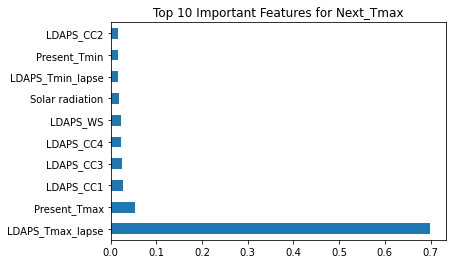

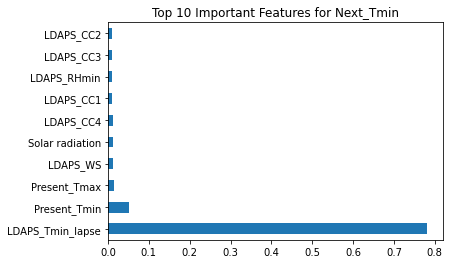

In [21]:
# Visualize feature importance from Random Forest
def plot_feature_importance(model, X, target_name):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f'Top 10 Important Features for {target_name}')
    plt.show()

plot_feature_importance(best_rf_max, pd.DataFrame(X_train_max, columns=X.columns), 'Next_Tmax')
plot_feature_importance(best_rf_min, pd.DataFrame(X_train_min, columns=X.columns), 'Next_Tmin')